## Load Dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [1]:
!pip install --upgrade --no-cache-dir gdown

In [2]:
import gdown
# https://drive.google.com/file/d/1TNQqH607rJFl0vp-OE1JTqz05p9IWhAv/view?usp=sharing
file_id = "1TNQqH607rJFl0vp-OE1JTqz05p9IWhAv"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "TeleCust.csv"

gdown.download(url, File_dir, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1TNQqH607rJFl0vp-OE1JTqz05p9IWhAv
To: /content/TeleCust.csv
100%|██████████| 37.0k/37.0k [00:00<00:00, 6.46MB/s]


'TeleCust.csv'

In [3]:
import pandas as pd

df = pd.read_csv('TeleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Check Corr

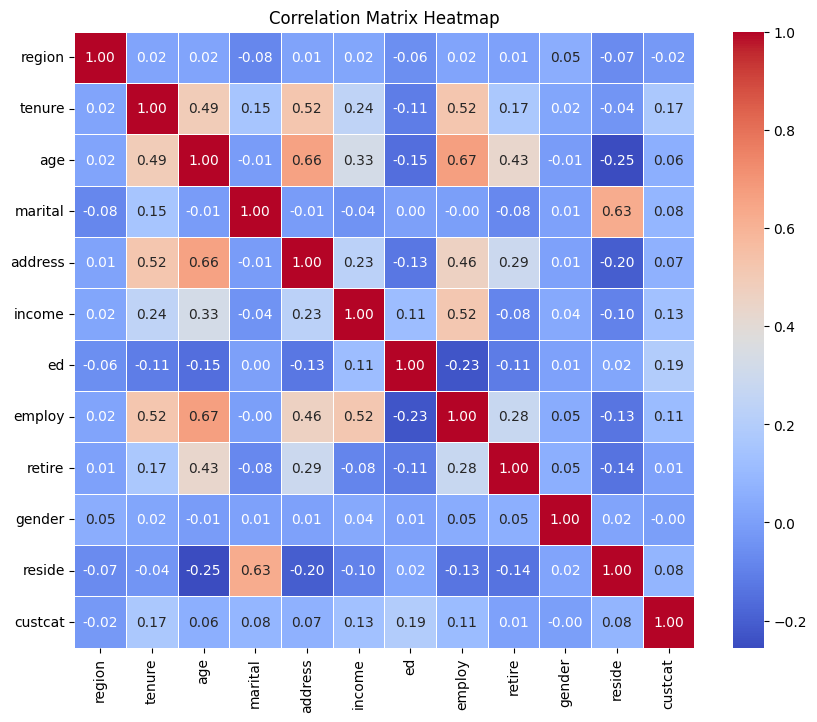

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 4: Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 2 Most Corr with Target

Top 2 features with highest correlation to target:
ed        0.193864
tenure    0.166691
Name: custcat, dtype: float64


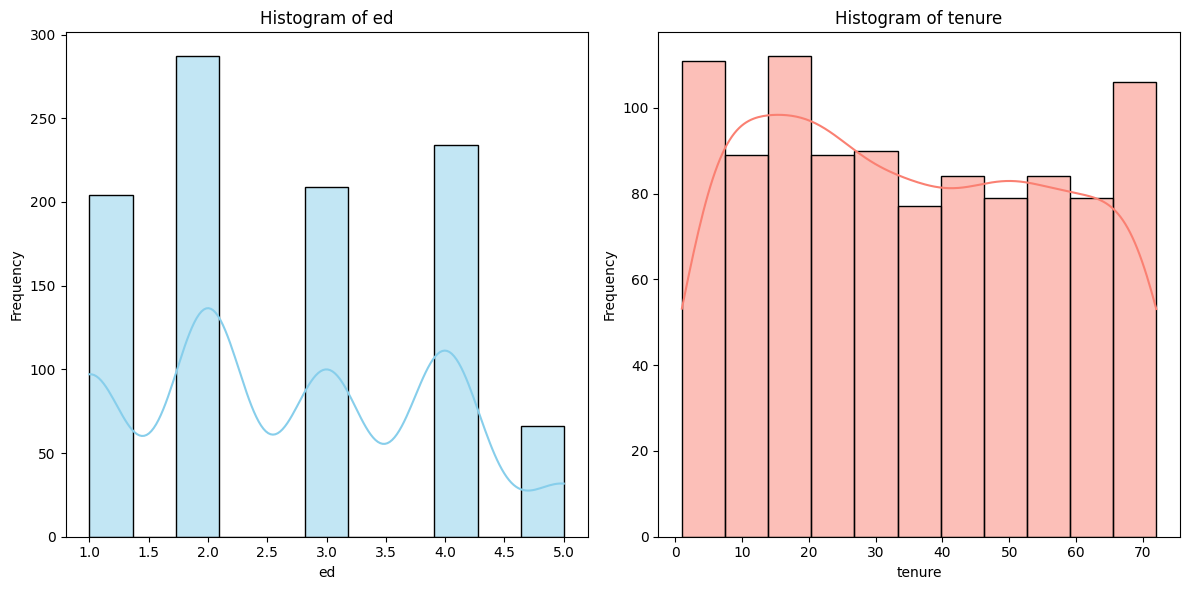

In [5]:
target = 'custcat'  # Change this to the actual target variable name in your dataset
correlations_with_target = correlation_matrix[target].drop(target)  # Remove the target itself

# Sort by absolute correlation values in descending order and select the top 2
top_features = correlations_with_target.abs().sort_values(ascending=False).head(2)

# Print the top 2 most correlated features with the target
print("Top 2 features with highest correlation to target:")
print(top_features)

# Step 6: Plot histograms of the two features
# Get the names of the top 2 features
feature_1, feature_2 = top_features.index

# Plot histograms
plt.figure(figsize=(12, 6))

# First histogram for the most correlated feature
plt.subplot(1, 2, 1)
sns.histplot(df[feature_1], kde=True, color='skyblue')
plt.title(f"Histogram of {feature_1}")
plt.xlabel(feature_1)
plt.ylabel('Frequency')

# Second histogram for the second most correlated feature
plt.subplot(1, 2, 2)
sns.histplot(df[feature_2], kde=True, color='salmon')
plt.title(f"Histogram of {feature_2}")
plt.xlabel(feature_2)
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

## Splitting Data

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

target = 'custcat'  # Replace with your target column name
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# Step 3: Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features

y = y - 1  # Subtract 1 from each label to make them 0-indexed

# Check the unique values after adjustment
print("Adjusted Unique Classes:", np.unique(y))  # Should print: [0, 1, 2, 3]


# Step 4: Split the data into train, validation, and test sets
# First, split into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Now, split the train+validation set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 5: Check the size of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Adjusted Unique Classes: [0 1 2 3]
Training set size: 637
Validation set size: 213
Test set size: 150


## Num of Neuron Effect



In [13]:
# Step 6: Define the function to create the MLP models
def create_mlp(hidden_layers, neurons, batch_norm=False, num_classes=4):
    model = Sequential()

    # First hidden layer
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    if batch_norm:
        model.add(BatchNormalization())

    # Add additional hidden layers if needed
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        if batch_norm:
            model.add(BatchNormalization())

    # Output layer: Use softmax for multiclass classification
    model.add(Dense(num_classes, activation='softmax'))  # num_classes should match the number of classes

    # Compile the model with SGD optimizer
    model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 7: Experiment with the models

# Hyperparameters
neurons_cases = [64, 128]  # Two cases for the number of neurons
hidden_layers_cases = [1, 2]  # One hidden layer vs two hidden layers
batch_norm_cases = [False, True]  # With and without batch normalization

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [14]:
num_classes = len(np.unique(y))  # Number of unique classes
print("Unique classes:", np.unique(y))  # Check what labels are in the target

Unique classes: [0 1 2 3]


In [16]:
from tensorflow.keras.optimizers import SGD

# Step 8: Train the models and evaluate
results = []

for neurons in neurons_cases:
    for hidden_layers in hidden_layers_cases:
        for batch_norm in batch_norm_cases:
            print(f"Training Model with {hidden_layers} Hidden Layers, {neurons} Neurons, Batch Normalization: {batch_norm}")

            # Create the model
            model = create_mlp(hidden_layers, neurons, batch_norm, num_classes=len(np.unique(y)))

            # Train the model
            history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

            # Evaluate the model
            train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

            # Store results
            results.append({
                'hidden_layers': hidden_layers,
                'neurons': neurons,
                'batch_norm': batch_norm,
                'train_loss': train_loss,
                'train_accuracy': train_accuracy,
                'val_loss': val_loss,
                'val_accuracy': val_accuracy
            })

Training Model with 1 Hidden Layers, 64 Neurons, Batch Normalization: False
Training Model with 1 Hidden Layers, 64 Neurons, Batch Normalization: True
Training Model with 2 Hidden Layers, 64 Neurons, Batch Normalization: False
Training Model with 2 Hidden Layers, 64 Neurons, Batch Normalization: True
Training Model with 1 Hidden Layers, 128 Neurons, Batch Normalization: False
Training Model with 1 Hidden Layers, 128 Neurons, Batch Normalization: True
Training Model with 2 Hidden Layers, 128 Neurons, Batch Normalization: False
Training Model with 2 Hidden Layers, 128 Neurons, Batch Normalization: True


In [17]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df

,hidden_layers,neurons,batch_norm,train_loss,train_accuracy,val_loss,val_accuracy
0,1,64,False,1.246894,0.409733,1.254184,0.413146
1,1,64,True,1.371279,0.279435,1.370658,0.286385
2,2,64,False,1.407664,0.238619,1.404601,0.253521
3,2,64,True,1.382148,0.259027,1.400689,0.178404
4,1,128,False,1.410638,0.241758,1.423331,0.201878
5,1,128,True,1.380427,0.288854,1.368817,0.295775
6,2,128,False,1.385841,0.274725,1.379622,0.272300
7,2,128,True,1.370068,0.306122,1.367146,0.323944


## Dropout Effect

In [18]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Step 6: Define a function to create models with configurable hidden layers and Dropout
def create_model(neurons, hidden_layers, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))  # Add Dropout after the first layer

    # Add additional hidden layers (if any)
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))  # Add Dropout after each layer

    # Add the output layer
    model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 7: Train and evaluate the best models with different Dropout rates
dropout_rates = [0.0, 0.3, 0.5]
results = []

# Configurations for the best models
configurations = [
    {"neurons": 64, "hidden_layers": 1},  # Best model with 1 hidden layer
    {"neurons": 128, "hidden_layers": 2}  # Best model with 2 hidden layers
]

for config in configurations:
    neurons = config['neurons']
    hidden_layers = config['hidden_layers']
    for dropout_rate in dropout_rates:
        print(f"Training Model with {hidden_layers} hidden layers, {neurons} neurons, and Dropout Rate: {dropout_rate}")

        # Create the model
        model = create_model(neurons=neurons, hidden_layers=hidden_layers, dropout_rate=dropout_rate)

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate the model
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

        # Store the results
        results.append({
            'hidden_layers': hidden_layers,
            'neurons': neurons,
            'dropout_rate': dropout_rate,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })

Training Model with 1 hidden layers, 64 neurons, and Dropout Rate: 0.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model with 1 hidden layers, 64 neurons, and Dropout Rate: 0.3
Training Model with 1 hidden layers, 64 neurons, and Dropout Rate: 0.5
Training Model with 2 hidden layers, 128 neurons, and Dropout Rate: 0.0
Training Model with 2 hidden layers, 128 neurons, and Dropout Rate: 0.3
Training Model with 2 hidden layers, 128 neurons, and Dropout Rate: 0.5


In [19]:
# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
results_df

,hidden_layers,neurons,dropout_rate,train_loss,train_accuracy,val_loss,val_accuracy
0,1,64,0.0,1.258196,0.403454,1.266799,0.427230
1,1,64,0.3,1.261541,0.409733,1.260447,0.441315
2,1,64,0.5,1.277586,0.405024,1.288160,0.394366
3,2,128,0.0,1.225528,0.414443,1.228043,0.431925
4,2,128,0.3,1.248271,0.433281,1.254427,0.431925
5,2,128,0.5,1.287957,0.422292,1.289617,0.422535


## L2-Regularization Effect

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Step 6: Define a function to create models with Dropout and L2 Regularization
def create_model(neurons, hidden_layers, dropout_rate, l2_rate=0.0001):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1],
                    kernel_regularizer=l2(l2_rate)))  # L2 Regularization
    model.add(Dropout(dropout_rate))  # Add Dropout

    # Add additional hidden layers (if applicable)
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_rate)))
        model.add(Dropout(dropout_rate))  # Add Dropout

    # Output layer
    model.add(Dense(4, activation='softmax', kernel_regularizer=l2(l2_rate)))  # Output layer for 4 classes

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 7: Select the best models and evaluate them
best_configurations = [
    {"neurons": 64, "hidden_layers": 1, "dropout_rate": 0.3},  # Best model for 1 hidden layer
    {"neurons": 128, "hidden_layers": 2, "dropout_rate": 0.5}  # Best model for 2 hidden layers
]

results = []

for config in best_configurations:
    neurons = config['neurons']
    hidden_layers = config['hidden_layers']
    dropout_rate = config['dropout_rate']
    print(f"Training Model with {hidden_layers} hidden layers, {neurons} neurons, Dropout Rate: {dropout_rate}, and L2 Regularization")

    # Create the model
    model = create_model(neurons=neurons, hidden_layers=hidden_layers, dropout_rate=dropout_rate, l2_rate=0.0001)

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

    # Store the results
    results.append({
        'hidden_layers': hidden_layers,
        'neurons': neurons,
        'dropout_rate': dropout_rate,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })

Training Model with 1 hidden layers, 64 neurons, Dropout Rate: 0.3, and L2 Regularization


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model with 2 hidden layers, 128 neurons, Dropout Rate: 0.5, and L2 Regularization


In [21]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,hidden_layers,neurons,dropout_rate,train_loss,train_accuracy,val_loss,val_accuracy
0,1,64,0.3,1.266590,0.411303,1.281370,0.427230
1,2,128,0.5,1.284166,0.412873,1.287958,0.422535


## Adam and RMSprop Effect

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Step 6: Define a function to create models with Dropout and configurable optimizers
def create_model(neurons, dropout_rate, optimizer_name):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

    # Create a new optimizer instance for each model
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=0.001)
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 7: Train and evaluate the two best models with Adam and RMSprop
optimizers = ['Adam', 'RMSprop']

best_configurations = [
    {"neurons": 64, "dropout_rate": 0.3, "hidden_layers": 1},  # Best 1-layer model
    {"neurons": 128, "dropout_rate": 0.5, "hidden_layers": 2}  # Best 2-layer model
]

results = []

for optimizer_name in optimizers:
    for config in best_configurations:
        neurons = config['neurons']
        dropout_rate = config['dropout_rate']
        hidden_layers = config['hidden_layers']
        print(f"Training Model with {hidden_layers} hidden layers, {neurons} neurons, Dropout Rate: {dropout_rate}, Optimizer: {optimizer_name}")

        # Create the model
        model = create_model(neurons=neurons, dropout_rate=dropout_rate, optimizer_name=optimizer_name)

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate the model
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

        # Store the results
        results.append({
            'optimizer': optimizer_name,
            'hidden_layers': hidden_layers,
            'neurons': neurons,
            'dropout_rate': dropout_rate,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

Training Model with 1 hidden layers, 64 neurons, Dropout Rate: 0.3, Optimizer: Adam


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model with 2 hidden layers, 128 neurons, Dropout Rate: 0.5, Optimizer: Adam
Training Model with 1 hidden layers, 64 neurons, Dropout Rate: 0.3, Optimizer: RMSprop
Training Model with 2 hidden layers, 128 neurons, Dropout Rate: 0.5, Optimizer: RMSprop


In [23]:
results_df

,optimizer,hidden_layers,neurons,dropout_rate,train_loss,train_accuracy,val_loss,val_accuracy
0,Adam,1,64,0.3,1.166408,0.452119,1.200786,0.436620
1,Adam,2,128,0.5,1.180016,0.447410,1.205546,0.446009
2,RMSprop,1,64,0.3,1.172257,0.464678,1.199444,0.417840
3,RMSprop,2,128,0.5,1.166696,0.467818,1.197545,0.431925


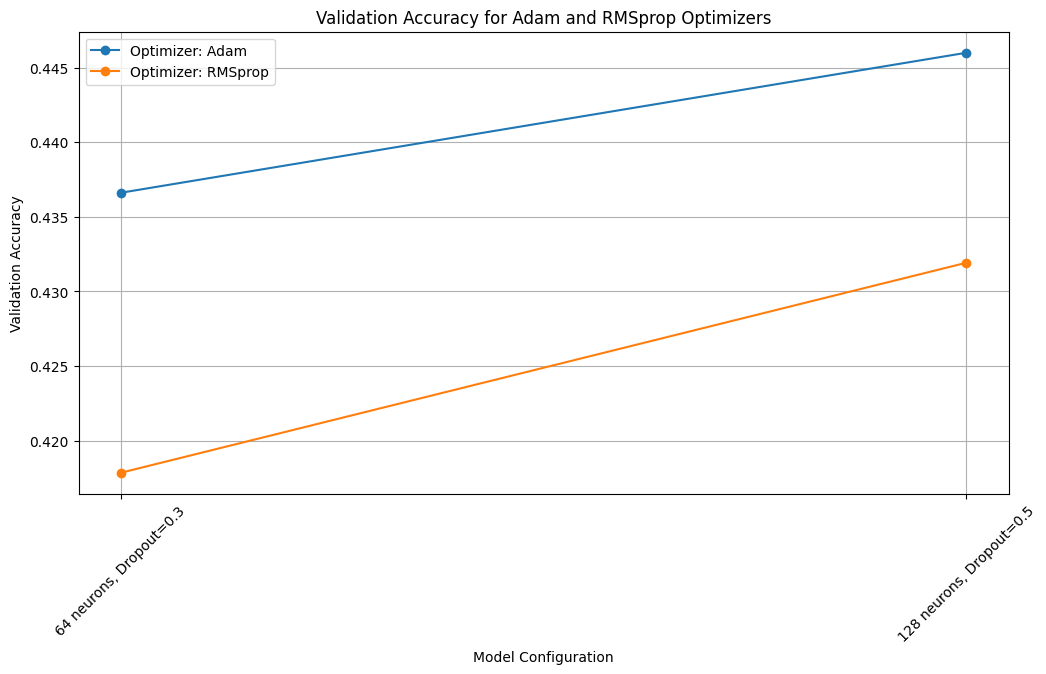

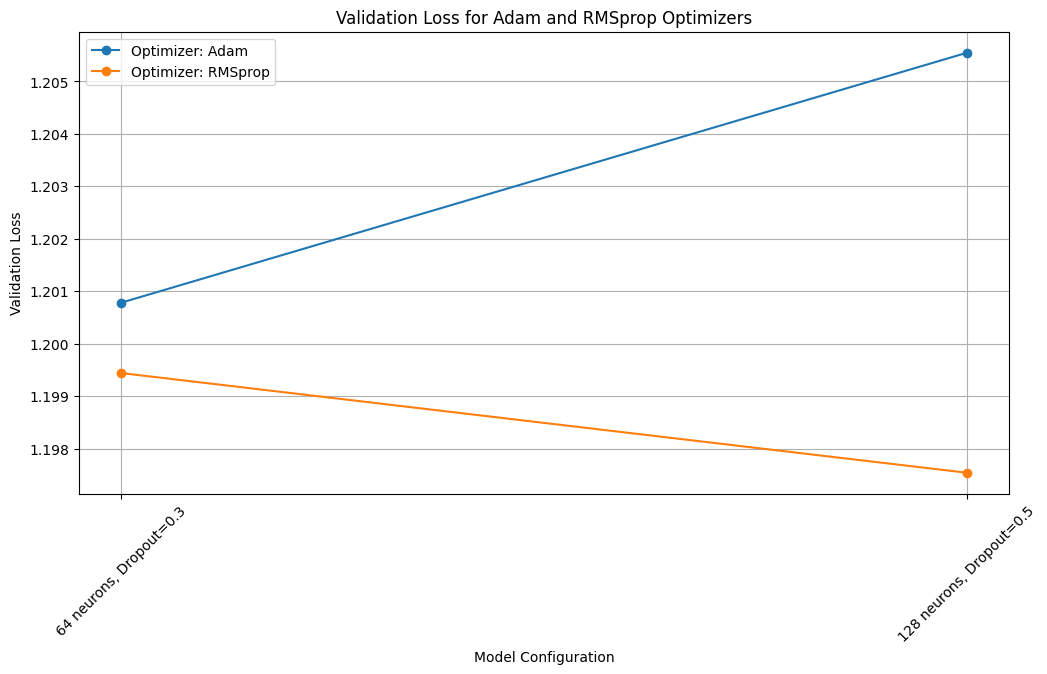

In [24]:
# Step 9: Visualize the results
import matplotlib.pyplot as plt

# Plot Validation Accuracy for each optimizer
plt.figure(figsize=(12, 6))
for optimizer_name in results_df['optimizer'].unique():
    subset = results_df[results_df['optimizer'] == optimizer_name]
    plt.plot(
        subset['neurons'].astype(str) + " neurons, Dropout=" + subset['dropout_rate'].astype(str),
        subset['val_accuracy'], marker='o', label=f"Optimizer: {optimizer_name}"
    )

plt.title('Validation Accuracy for Adam and RMSprop Optimizers')
plt.xlabel('Model Configuration')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Plot Validation Loss for each optimizer
plt.figure(figsize=(12, 6))
for optimizer_name in results_df['optimizer'].unique():
    subset = results_df[results_df['optimizer'] == optimizer_name]
    plt.plot(
        subset['neurons'].astype(str) + " neurons, Dropout=" + subset['dropout_rate'].astype(str),
        subset['val_loss'], marker='o', label=f"Optimizer: {optimizer_name}"
    )

plt.title('Validation Loss for Adam and RMSprop Optimizers')
plt.xlabel('Model Configuration')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

## Test 2 best Models

In [25]:
import random
import numpy as np

# Step 1: Select 10 random samples from the test dataset
random_indices = random.sample(range(X_test.shape[0]), 10)
X_test_samples = X_test[random_indices]
y_test_samples = np.array(y_test)[random_indices]  # True labels for the samples

# Step 2: Configurations for all 4 models
model_configurations = [
    {"neurons": 64, "dropout_rate": 0.3, "hidden_layers": 1, "optimizer": "Adam"},  # Model 1: Adam, 1 Layer
    {"neurons": 128, "dropout_rate": 0.5, "hidden_layers": 2, "optimizer": "Adam"},  # Model 2: Adam, 2 Layers
    {"neurons": 64, "dropout_rate": 0.3, "hidden_layers": 1, "optimizer": "RMSprop"},  # Model 3: RMSprop, 1 Layer
    {"neurons": 128, "dropout_rate": 0.5, "hidden_layers": 2, "optimizer": "RMSprop"},  # Model 4: RMSprop, 2 Layers
]

# Function to create the model
def create_model(neurons, hidden_layers, dropout_rate, optimizer_name):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))

    # Add additional hidden layers if necessary
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

    # Create the optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=0.001)
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 3: Retrain and test all models
for config in model_configurations:
    neurons = config['neurons']
    dropout_rate = config['dropout_rate']
    hidden_layers = config['hidden_layers']
    optimizer_name = config['optimizer']

    print(f"Retraining Model with {hidden_layers} hidden layers, {neurons} neurons, Dropout Rate: {dropout_rate}, Optimizer: {optimizer_name}")

    # Create the model
    model = create_model(neurons=neurons, hidden_layers=hidden_layers, dropout_rate=dropout_rate, optimizer_name=optimizer_name)

    # Retrain the model on the full training set
    model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0
    )

    # Step 4: Predict the labels for the 10 random test samples
    y_pred_samples = model.predict(X_test_samples)
    y_pred_labels = np.argmax(y_pred_samples, axis=1)  # Convert probabilities to class labels

    # Display results
    print(f"\n{'=' * 80}")
    print(f"Results for Model with Optimizer: {optimizer_name}, Hidden Layers: {hidden_layers}, Neurons: {neurons}, Dropout Rate: {dropout_rate}")
    print(f"{'=' * 80}")
    print(f"{'Index':<10} {'True Label':<12} {'Predicted Label':<18} {'Prediction Probabilities'}")
    print(f"{'-' * 80}")

    for idx, true_label, pred_label, probs in zip(random_indices, y_test_samples, y_pred_labels, y_pred_samples):
        prob_str = ', '.join([f"{p:.4f}" for p in probs])  # Format probabilities to 4 decimal places
        print(f"{idx:<10} {true_label:<12} {pred_label:<18} [{prob_str}]")

    print(f"{'=' * 80}")

Retraining Model with 1 hidden layers, 64 neurons, Dropout Rate: 0.3, Optimizer: Adam


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Results for Model with Optimizer: Adam, Hidden Layers: 1, Neurons: 64, Dropout Rate: 0.3
Index      True Label   Predicted Label    Prediction Probabilities
--------------------------------------------------------------------------------
115        0            0                  [0.4201, 0.1291, 0.2928, 0.1579]
30         1            2                  [0.4083, 0.0620, 0.4792, 0.0506]
146        3            2                  [0.1699, 0.2947, 0.3437, 0.1917]
131        3            3                  [0.1051, 0.2619, 0.2900, 0.3429]
43         2            2                  [0.2965, 0.0985, 0.5402, 0.0648]
62         3            2                  [0.3380, 0.1301, 0.3739, 0.1579]
61         0            1                  [0.0967, 0.3839, 0.2099, 0.3095]
25         1            2                  [0.2817, 0.1837, 0.4270, 0.1076]
108        0            0                  [0.4536, 0.0985, 0.2469, 0.2010]
120        2            2              

## Adding Simple Model and Test

In [26]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

# Function to create a model (reused from previous steps)
def create_model(neurons, hidden_layers, dropout_rate, optimizer_name):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))

    # Add additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

    # Optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=0.001)
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)

    # Compile model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Best model configurations
best_models = [
    {"neurons": 64, "hidden_layers": 1, "dropout_rate": 0.3, "optimizer": "Adam"},  # Best 1-layer model
    {"neurons": 128, "hidden_layers": 2, "dropout_rate": 0.5, "optimizer": "RMSprop"}  # Best 2-layer model
]

# Retrain the models and get predictions
test_predictions = []
train_predictions = []

for config in best_models:
    neurons = config['neurons']
    hidden_layers = config['hidden_layers']
    dropout_rate = config['dropout_rate']
    optimizer_name = config['optimizer']

    print(f"Training Model: {hidden_layers} Hidden Layers, {neurons} Neurons, Dropout Rate: {dropout_rate}, Optimizer: {optimizer_name}")

    # Create and train the model
    model = create_model(neurons=neurons, hidden_layers=hidden_layers, dropout_rate=dropout_rate, optimizer_name=optimizer_name)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate train and validation loss and accuracy
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Get probabilities on the train and test sets
    train_probs = model.predict(X_train)
    test_probs = model.predict(X_test)

    train_predictions.append(train_probs)
    test_predictions.append(test_probs)

# Combine predictions using soft voting
ensemble_train_predictions = np.mean(train_predictions, axis=0)  # Average probabilities for train
ensemble_test_predictions = np.mean(test_predictions, axis=0)  # Average probabilities for test

# Convert probabilities to class labels
ensemble_train_labels = np.argmax(ensemble_train_predictions, axis=1)
ensemble_test_labels = np.argmax(ensemble_test_predictions, axis=1)

# Evaluate the ensemble model on the train set
ensemble_train_accuracy = accuracy_score(y_train, ensemble_train_labels)
print(f"\nEnsemble Model Accuracy on Train Set: {ensemble_train_accuracy:.4f}")

# Train classification report
print("\nClassification Report for Ensemble Model (Train Set):")
print(classification_report(y_train, ensemble_train_labels))

# Evaluate the ensemble model on the test set
ensemble_test_accuracy = accuracy_score(y_test, ensemble_test_labels)
print(f"\nEnsemble Model Accuracy on Test Set: {ensemble_test_accuracy:.4f}")

# Test classification report
print("\nClassification Report for Ensemble Model (Test Set):")
print(classification_report(y_test, ensemble_test_labels))

Training Model: 1 Hidden Layers, 64 Neurons, Dropout Rate: 0.3, Optimizer: Adam


Train Loss: 1.1907, Train Accuracy: 0.4458
Validation Loss: 1.2204, Validation Accuracy: 0.4413
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Model: 2 Hidden Layers, 128 Neurons, Dropout Rate: 0.5, Optimizer: RMSprop
Train Loss: 1.1554, Train Accuracy: 0.4631
Validation Loss: 1.1970, Validation Accuracy: 0.4507
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Ensemble Model Accuracy on Train Set: 0.4474

Classification Report for Ensemble Model (Train Set):
              precision    recall  f1-score   support

           0       0.46      0.53      0.50       161
           1       0.45      0.40      0.42       149
           2       0.45      0.42      0.44       183
           3       0.42      0.44      0.43       144

    accuracy                           0.45       637
   macro avg       0.45      0.45      0.45       637
weighted avg       0.45      0.45      0.45       637


Ensemble Model Accuracy on Test 

Confusion Matrix for Train Set:


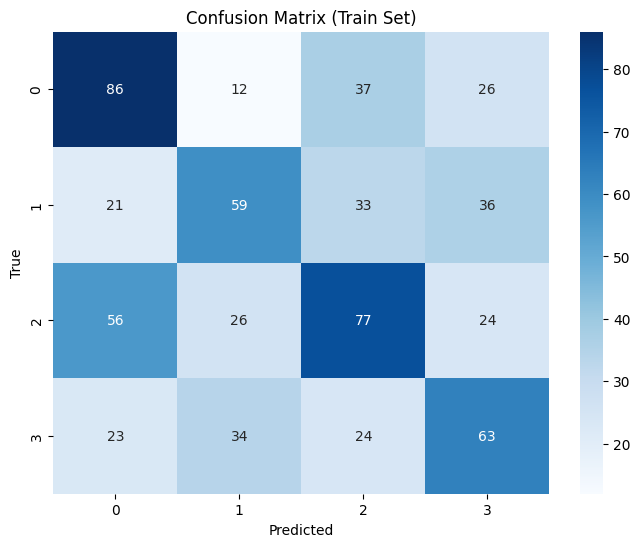

Confusion Matrix for Test Set:


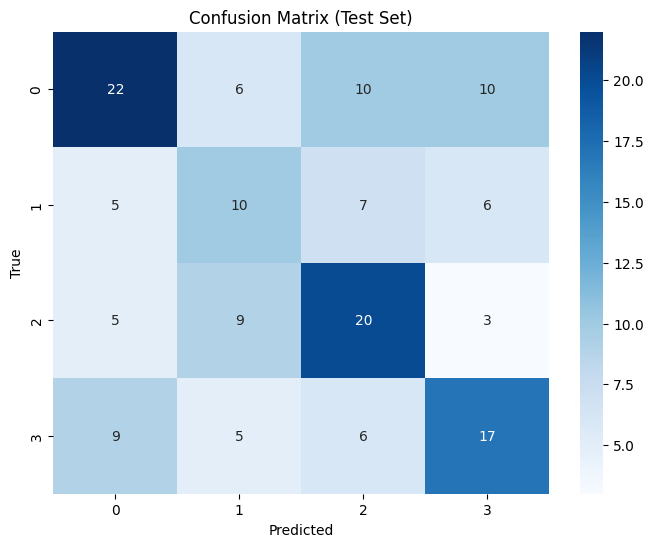

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Assuming y_train, y_test, ensemble_train_labels, and ensemble_test_labels are available

# Define class labels (adjust if you have more than 4 classes)
class_labels = [0, 1, 2, 3]  # Adjust according to your classes (e.g., [0, 1, 2, 3] for 4 classes)

# Plot confusion matrix for train set
print("Confusion Matrix for Train Set:")
plot_confusion_matrix(y_train, ensemble_train_labels, labels=class_labels, title='Confusion Matrix (Train Set)')

# Plot confusion matrix for test set
print("Confusion Matrix for Test Set:")
plot_confusion_matrix(y_test, ensemble_test_labels, labels=class_labels, title='Confusion Matrix (Test Set)')